# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

df = pd.read_csv("SINASC_RO_2019.csv")
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
print(df.shape)

df['APGAR5'].isna().sum()

(27028, 69)


103

In [3]:
df.dropna(subset=['APGAR5'], inplace=True)

print(df.shape)

(26925, 69)


In [4]:
df.loc[:, 'APGAR5_class'] = 'asfixia severa'
df.loc[df['APGAR5'] > 3, 'APGAR5_class'] = 'asfixia moderada'
df.loc[df['APGAR5'] > 5, 'APGAR5_class'] = 'asfixia leve'
df.loc[df['APGAR5'] > 7, 'APGAR5_class'] = 'normal'
df['APGAR5_class'].value_counts()

APGAR5_class
normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

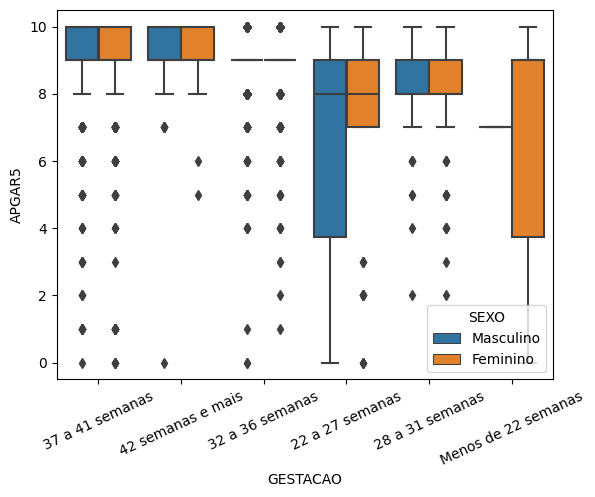

In [5]:
fig, ax = plt.subplots()

sns.boxplot(data=df,
            x='GESTACAO',
            y='APGAR5',
            hue='SEXO'
            )

ax.tick_params(axis='x', rotation= 25)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
tab_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

tab_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
freq_tab_cruzada = tab_cruzada.div(tab_cruzada.sum(axis=1), axis=0)
freq_tab_cruzada_format = freq_tab_cruzada.applymap(lambda x: '{:.2f}%'.format(x * 100))
freq_tab_cruzada_format

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24%,0.00%,9.41%,7.06%,1.18%,0.00%,2.35%,11.76%,28.24%,22.35%,9.41%
28 a 31 semanas,0.00%,0.00%,1.23%,0.62%,3.09%,4.32%,4.32%,6.79%,37.65%,33.95%,8.02%
32 a 36 semanas,0.09%,0.09%,0.09%,0.09%,0.36%,0.49%,0.76%,2.51%,16.20%,58.50%,20.81%
37 a 41 semanas,0.02%,0.09%,0.01%,0.02%,0.03%,0.09%,0.20%,0.67%,6.29%,60.23%,32.34%
42 semanas e mais,0.14%,0.00%,0.00%,0.00%,0.00%,0.14%,0.14%,0.72%,6.30%,60.60%,31.95%
Menos de 22 semanas,14.29%,0.00%,14.29%,0.00%,0.00%,0.00%,0.00%,14.29%,0.00%,42.86%,14.29%


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

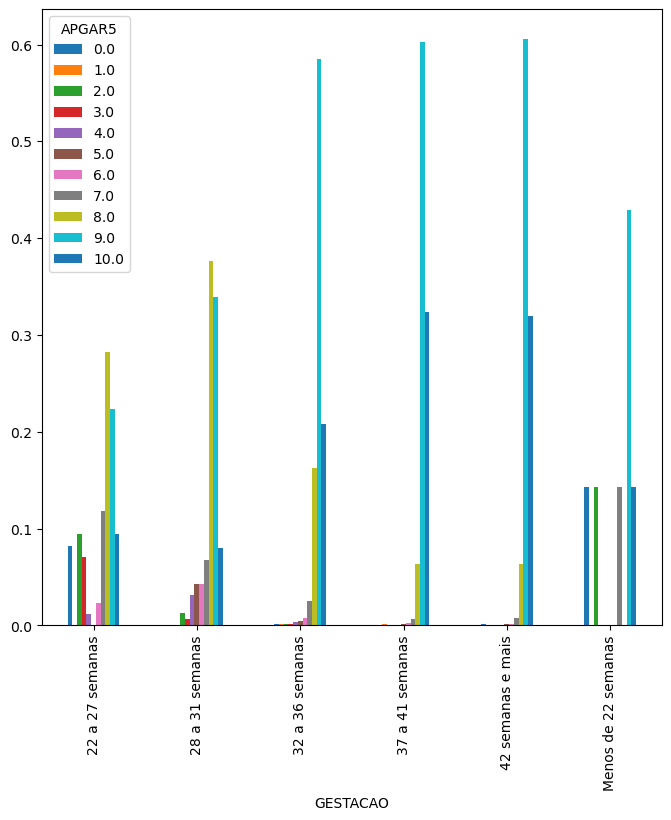

In [8]:
plt.rc('figure', figsize=(8, 8))
freq_tab_cruzada.plot.bar()

In [9]:
# o gráfico acima parece corroborar com a prática médica, pois os maiores percentuais de APGAR5 na faixa 'normal'
# estão presentes nos grupos entre 37 e 42 semanas. Menos de 22 semanas não representa bem o fenômeno devido
# à pequena amostragem

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

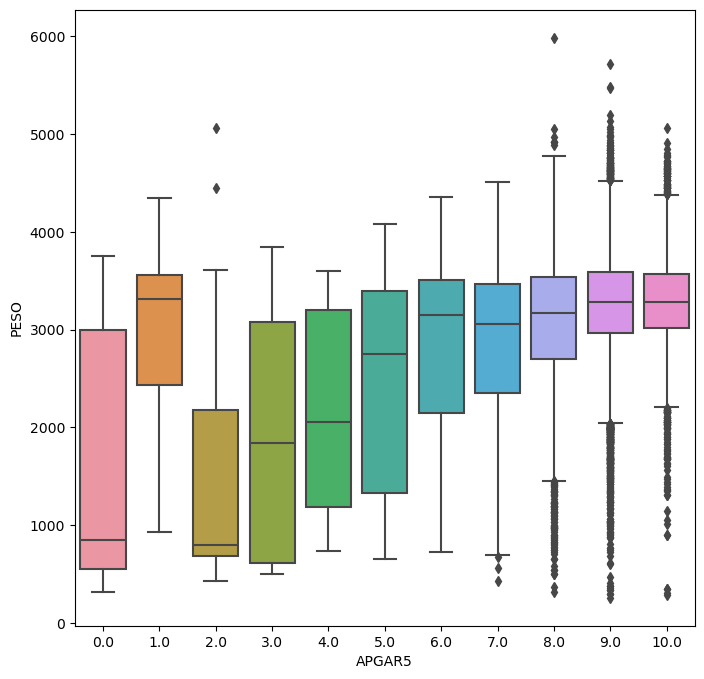

In [10]:
sns.boxplot(data=df,
             y='PESO',
             x='APGAR5'
             )

In [11]:
# parece haver uma concentração dos dados na faixa entre 2000 e 4000 de peso, acentuando-se quanto maior é o
# valor de APGAR5 medido